Suppl. Fig. 2, 6, 7, 8, 9: compare deterministic and stochastic mode and measure the effects of various parameters choices on the absorption probabilities
----
Compare 4 different variations: determistic or stochastic kernel and fixed or non-fixed terminal states on
different parameter settings.

# Preliminaries

In this notebook, we plot the CellRank robustness results, such as comparing #HVGs, subsetting the data.
We also plot the comparison between the deterministic and stochastic when pertubing #neighbors.

## Dependency notebooks

1. [analysis_notebooks/MK_2020-10-16_min_shared_counts.ipynb](analysis_notebooks/MK_2020-10-16_min_shared_counts.ipynb)
2. [analysis_notebooks/MK_2020-10-16_n_neighbors.ipynb](analysis_notebooks/MK_2020-10-16_n_neighbors.ipynb)
3. [analysis_notebooks/MK_2020-10-16_n_pcs.ipynb](analysis_notebooks/MK_2020-10-16_n_pcs.ipynb)
4. [analysis_notebooks/MK_2020-10-16_n_top_hvgs.ipynb](analysis_notebooks/MK_2020-10-16_n_top_hvgs.ipynb)
5. [analysis_notebooks/MK_2020-10-16_subset.ipynb](analysis_notebooks/MK_2020-10-16_subset.ipynb)
6. [analysis_notebooks/MK_2021-01-20_weight_connectivities.ipynb](analysis_notebooks/MK_2021-01-20_weight_connectivities.ipynb)

## Import packages

In [1]:
# import standard packages
from pathlib import Path
from collections import defaultdict
import sys
import os

import pickle
pickle.DEFAULT_PROTOCOL = 4
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

# import single-cell packages
import cellrank as cr

# import utilities
import analysis_notebooks.utils.utils as utils

## Print package versions for reproducibility

In [2]:
cr.logging.print_versions()

cellrank==1.5.0+g65f1562 scanpy==1.8.1 anndata==0.7.6 numpy==1.20.3 numba==0.54.0 scipy==1.7.1 pandas==1.3.3 pygpcca==1.0.2 scikit-learn==0.24.2 statsmodels==0.13.0rc0 python-igraph==0.9.1 scvelo==0.2.4 pygam==0.8.0 matplotlib==3.4.3 seaborn==0.11.2


## Set up paths

In [3]:
sys.path.insert(0, "../..")  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, FIG_DIR

## Set global parameters

Note: the pickled file are in pickle protocol 4, not 5 (highest at the moment).

In [4]:
sns.set(font_scale=2.0)

In [5]:
root = DATA_DIR / "benchmarking" / "robustness_analysis"

# root = Path("robustness_cleaned") #Path("/storage/groups/ml01/projects/2020_cellrank_marius.lange/home/robustness_cleaned")

roots = [root / "robustness" / "data",  # stochastic mode
         root / "robustness_fixed" / "data",  # stochastic mode
         root / "robustness_det" / "data",
         root / "robustness_det_fixed" / "data"]
names = ["stoch", "stoch_fixed", "det", "det_fixed"]

In [6]:
pretty_labels = {
    'weight_conn.pickle': 'weight connectivities',
    'n_neighbors.pickle': '#nearest neighbors',
    'msc.pickle': 'min. shared counts',
    'n_top_genes.pickle': '#HVGs',
    'n_pcs.pickle': '#PCs',
    'subsampling.pickle': 'subsampling',
}

neighs = [roots[-1] / 'n_neighbors.pickle', roots[1] / 'n_neighbors.pickle']

save_figure = True

## Define utility functions

In [7]:
def extract_min_max(dir_, fnames):
    vmin, vmax = np.inf, -np.inf
    res = {}
    for fname in fnames:
        path = dir_ / fname if dir_ is not None else fname
        if fname == "subsampling.pickle":
            assert dir_ is not None, "dir_ is None"
            with open(dir_ / "subsampling_obs_names.pickle", "rb") as fin:
                obs_names = pickle.load(fin)
        else:
            obs_names = None
            
        with open(path, "rb") as fin:
            data = pickle.load(fin)
            minn, maxx = utils.plot_correlation_map(data,
                                                    barcodes_align=fname != "subsampling.pickle",
                                                    return_ranges=True,
                                                    subsampling=obs_names,
                                                    axes=None)
            vmin, vmax = min(minn, vmin), max(maxx, vmax)
            res[fname] = data
    
    return vmin, vmax, res

# Plot the results

## Plot the robustness results

This generates plots for the following combinations:
- deterministic mode with fixed terminal states
- deterministic mode with non-fixed terminal states
- stochastic mode with fixed terminal states
- stochastic mode with non-fixed terminal states

In [8]:
tmp = defaultdict(dict)  # save the correlation matrices for significance testing

Processing: stoch
Processing: stoch_fixed
Processing: det
Processing: det_fixed


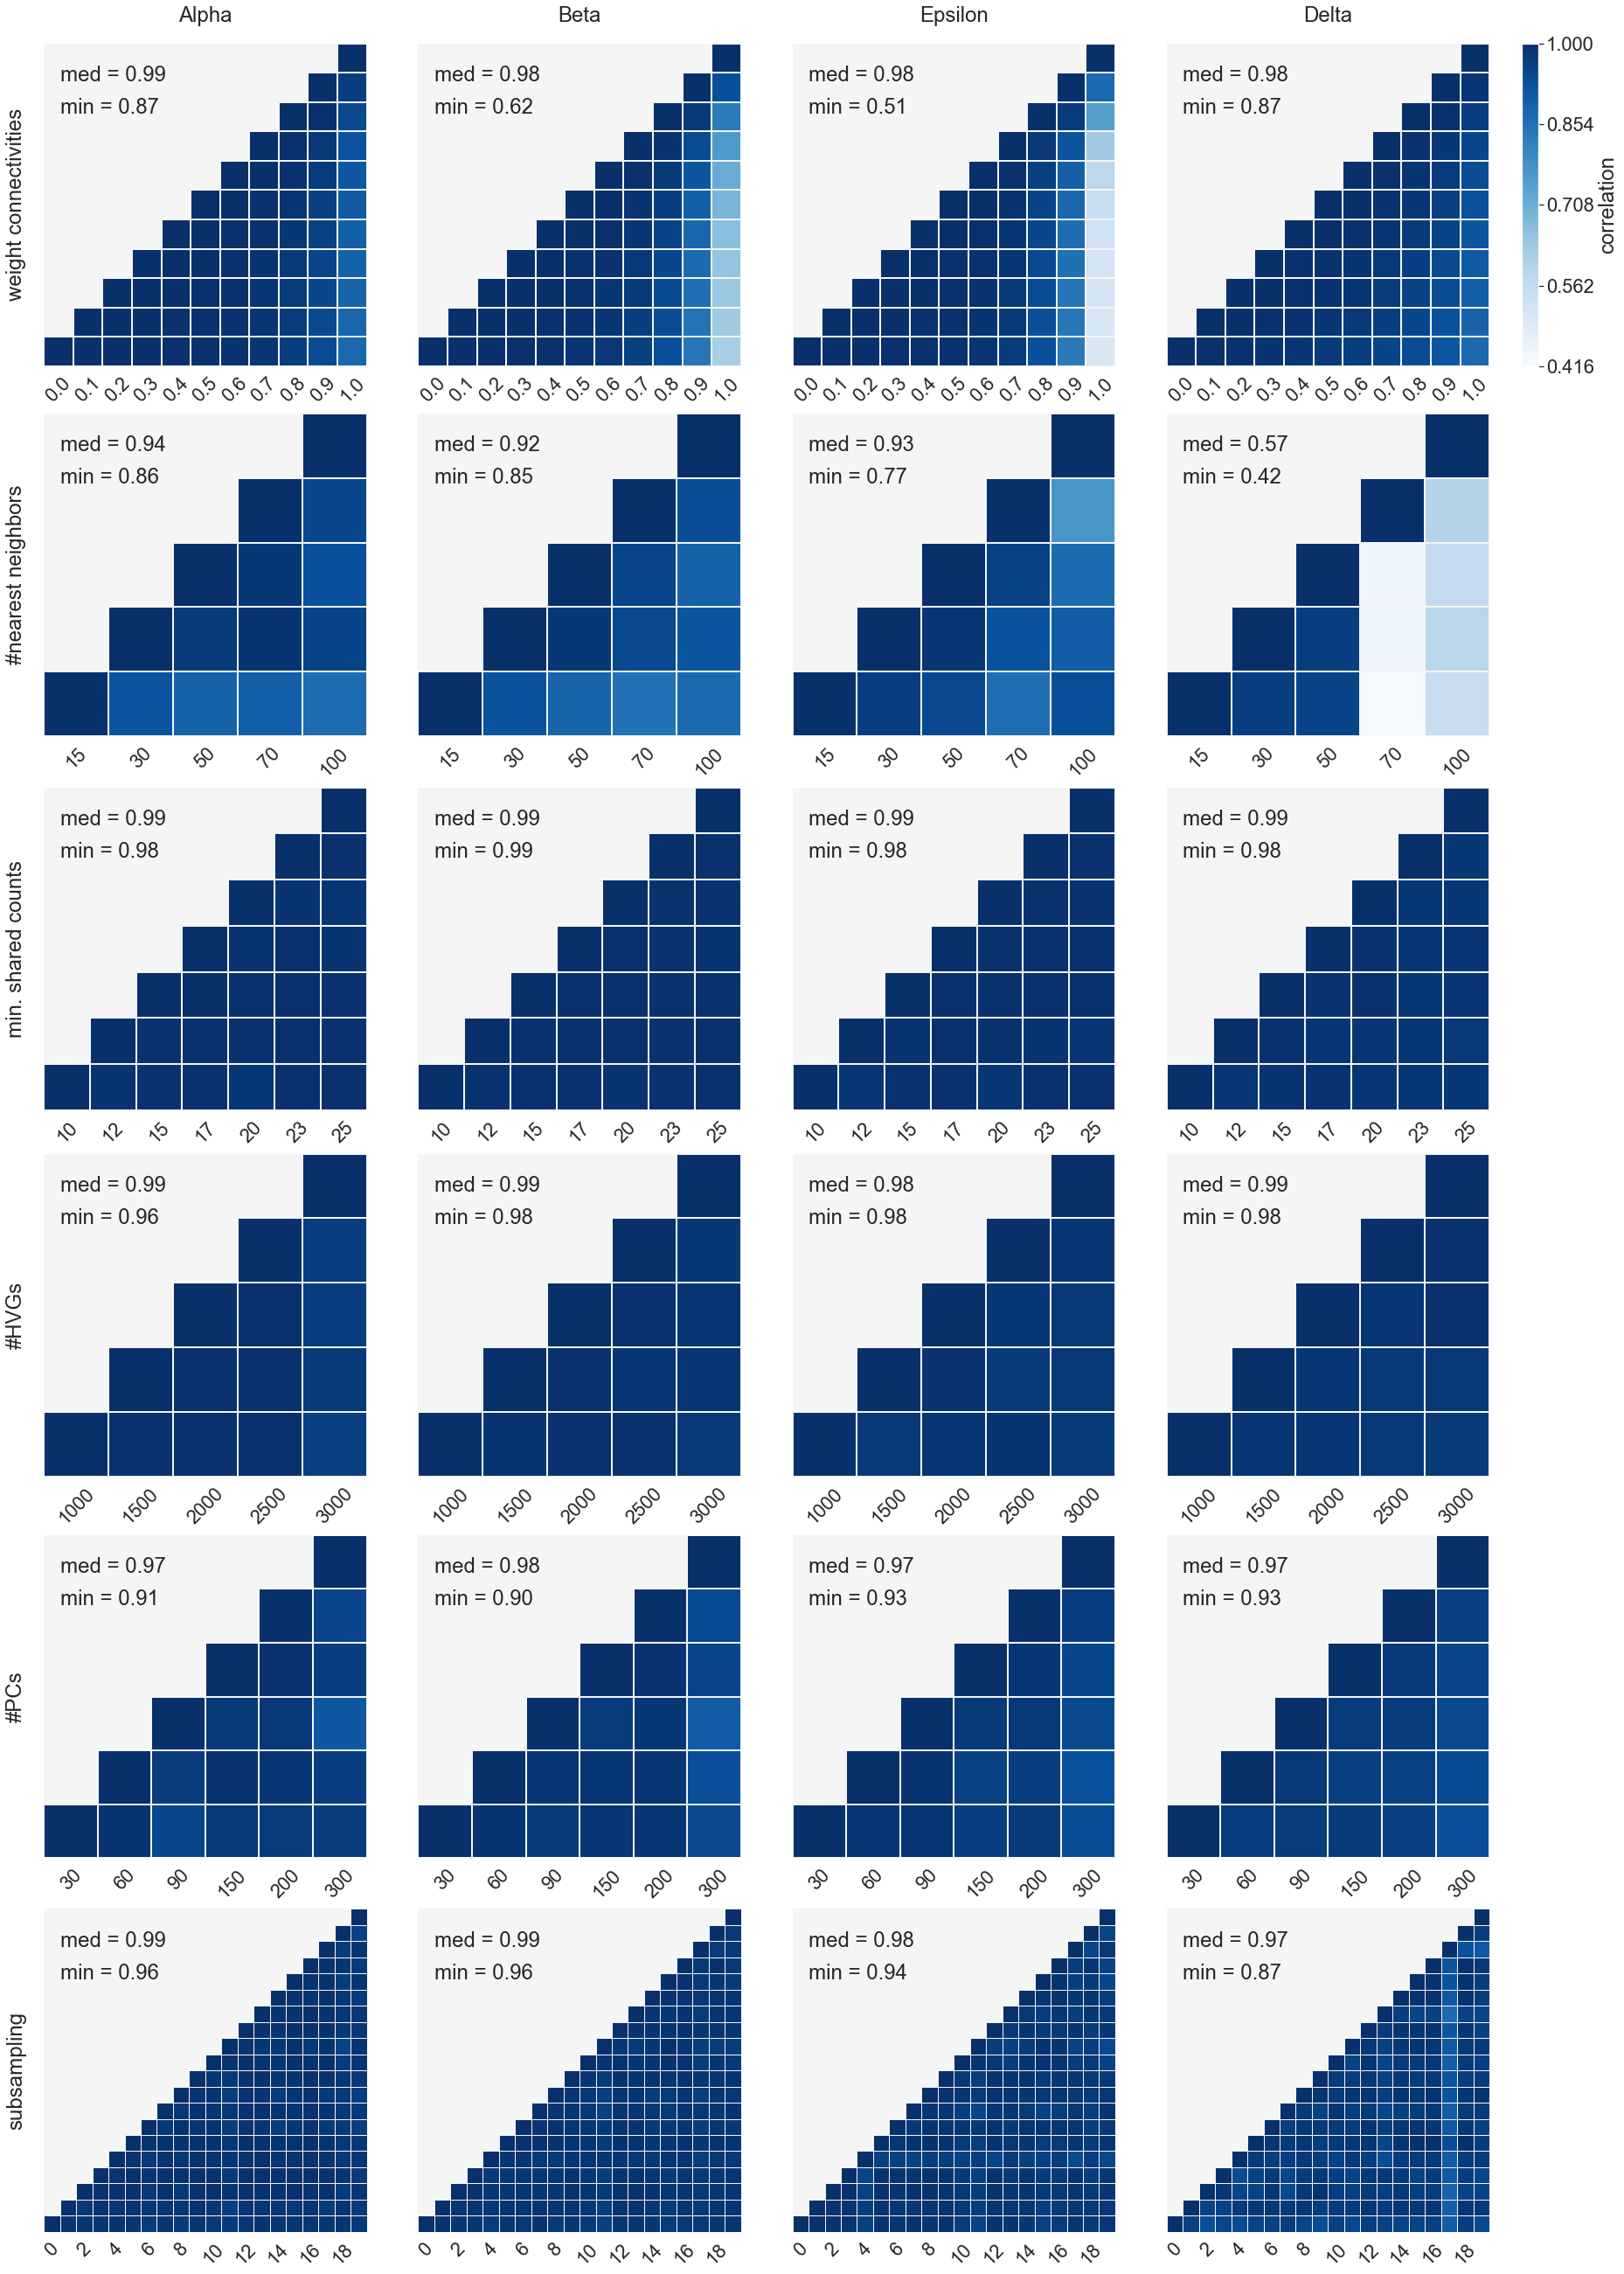

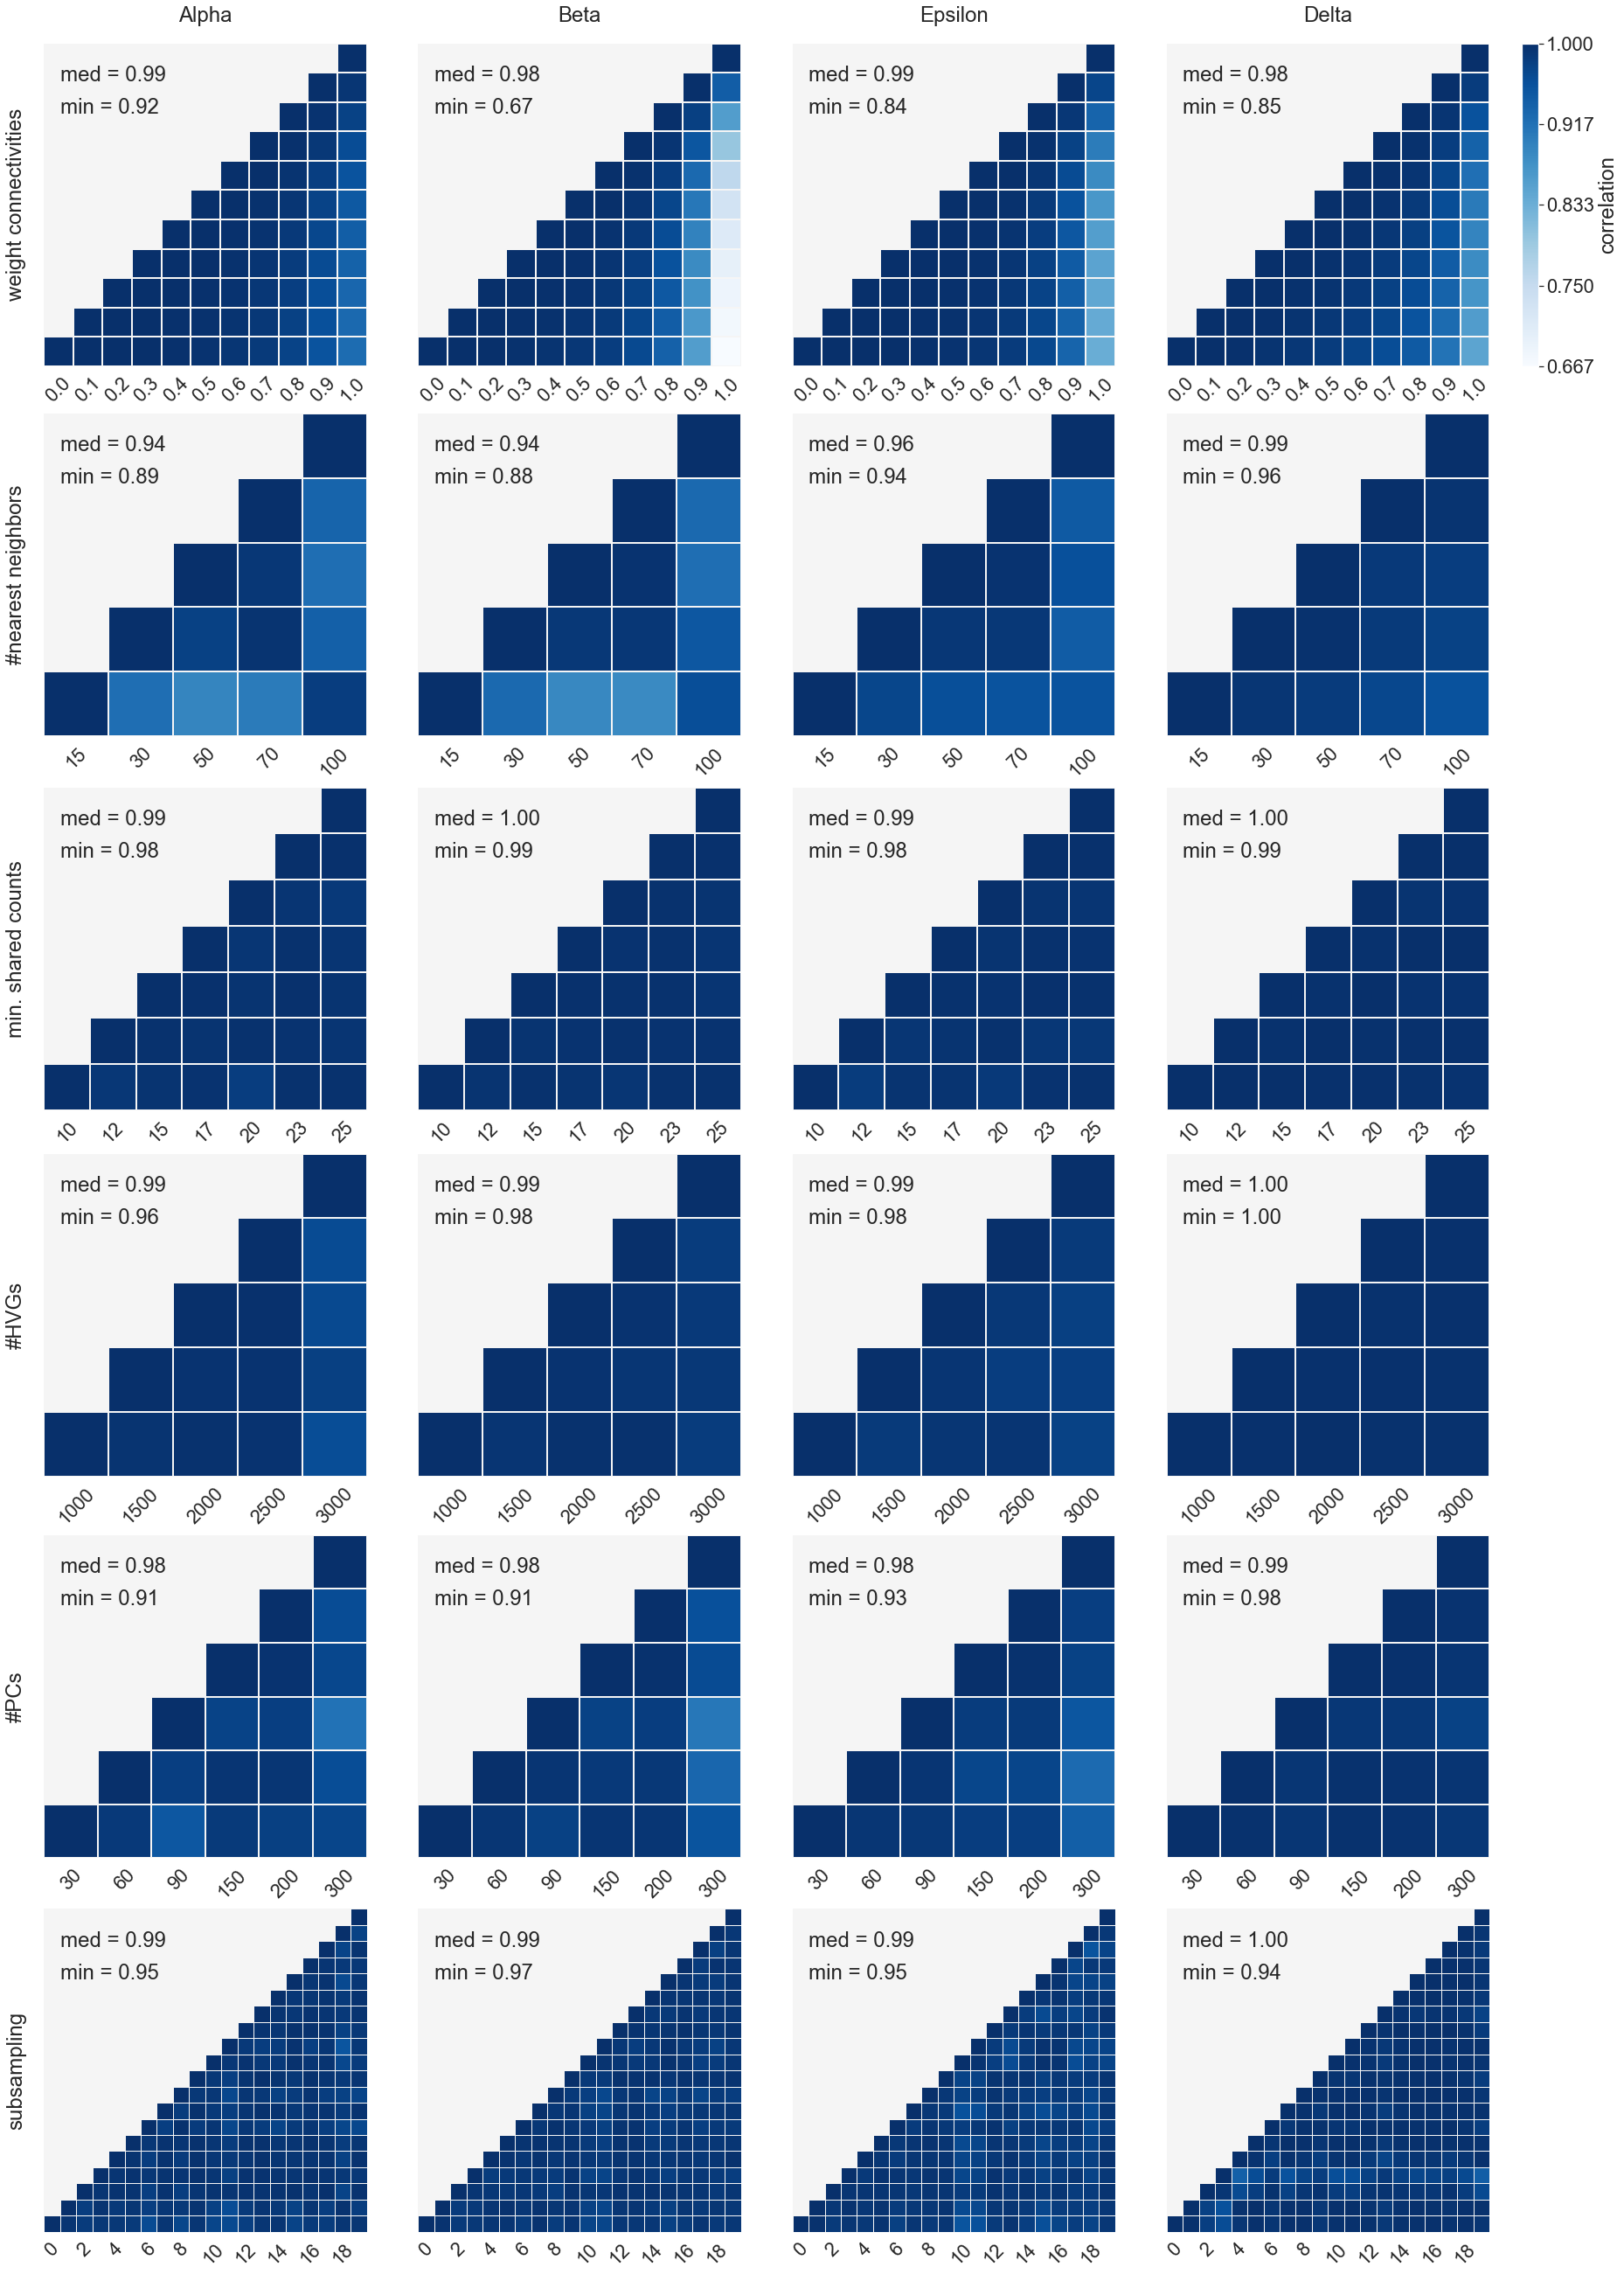

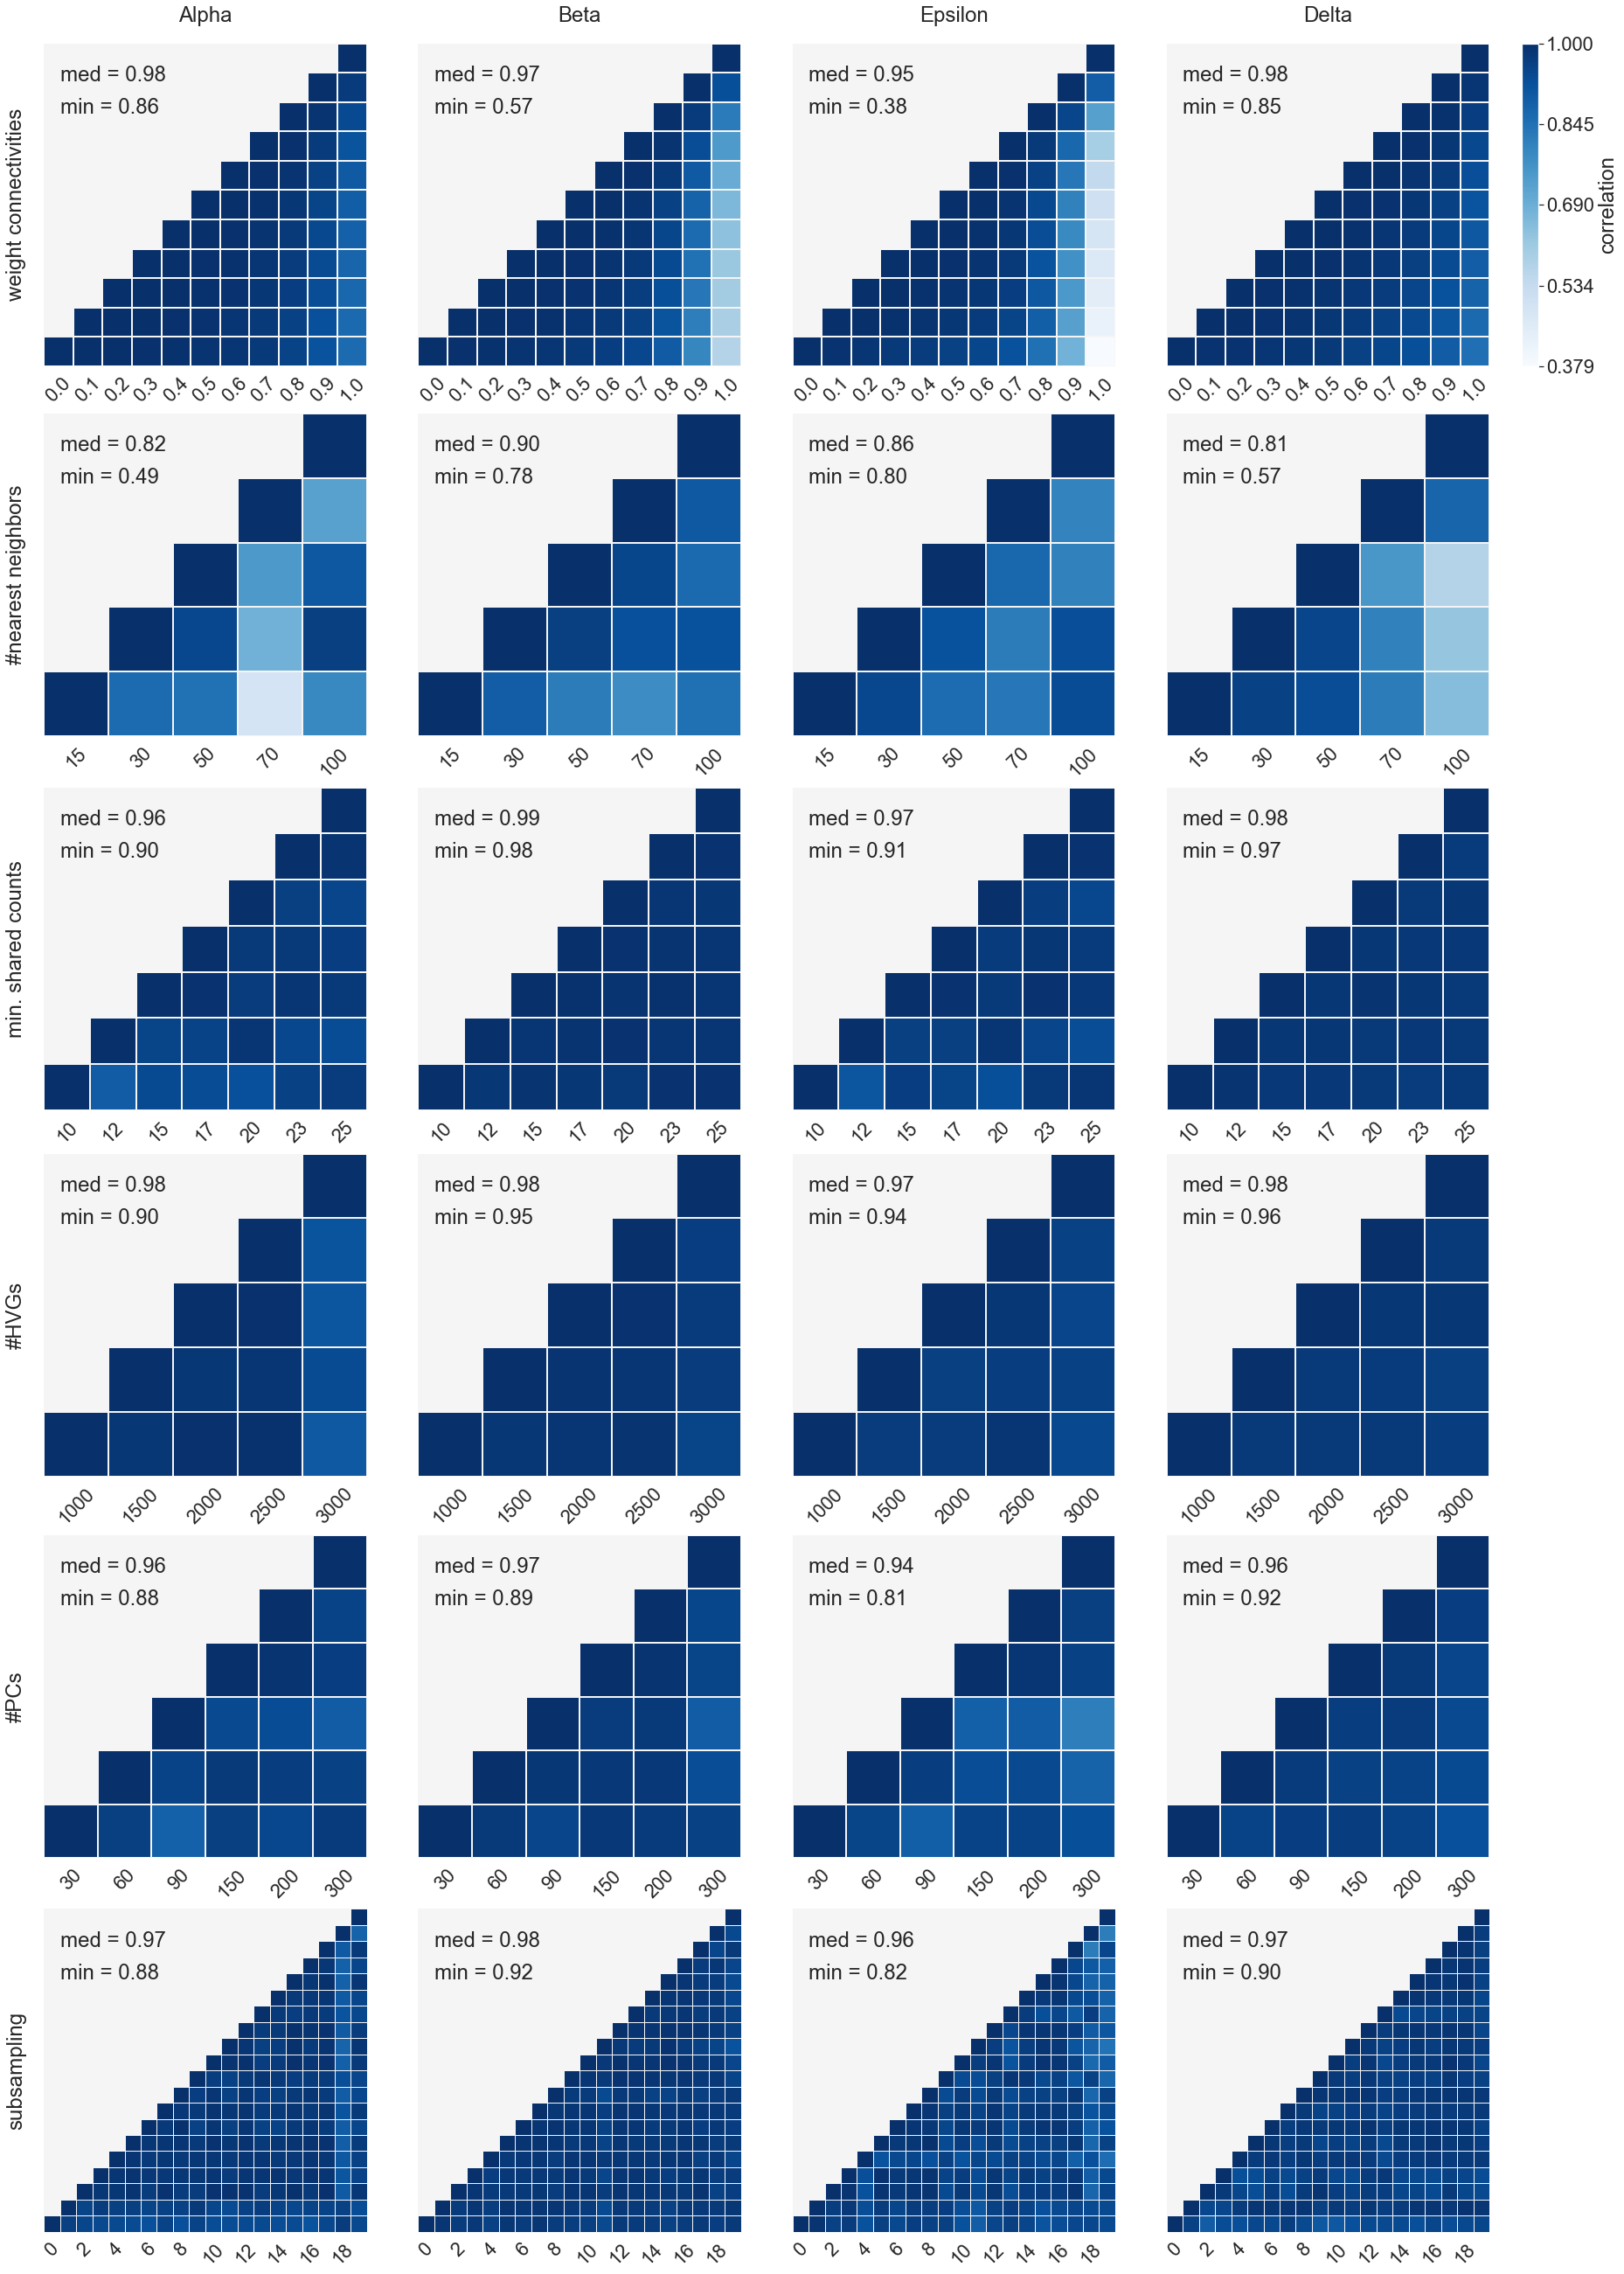

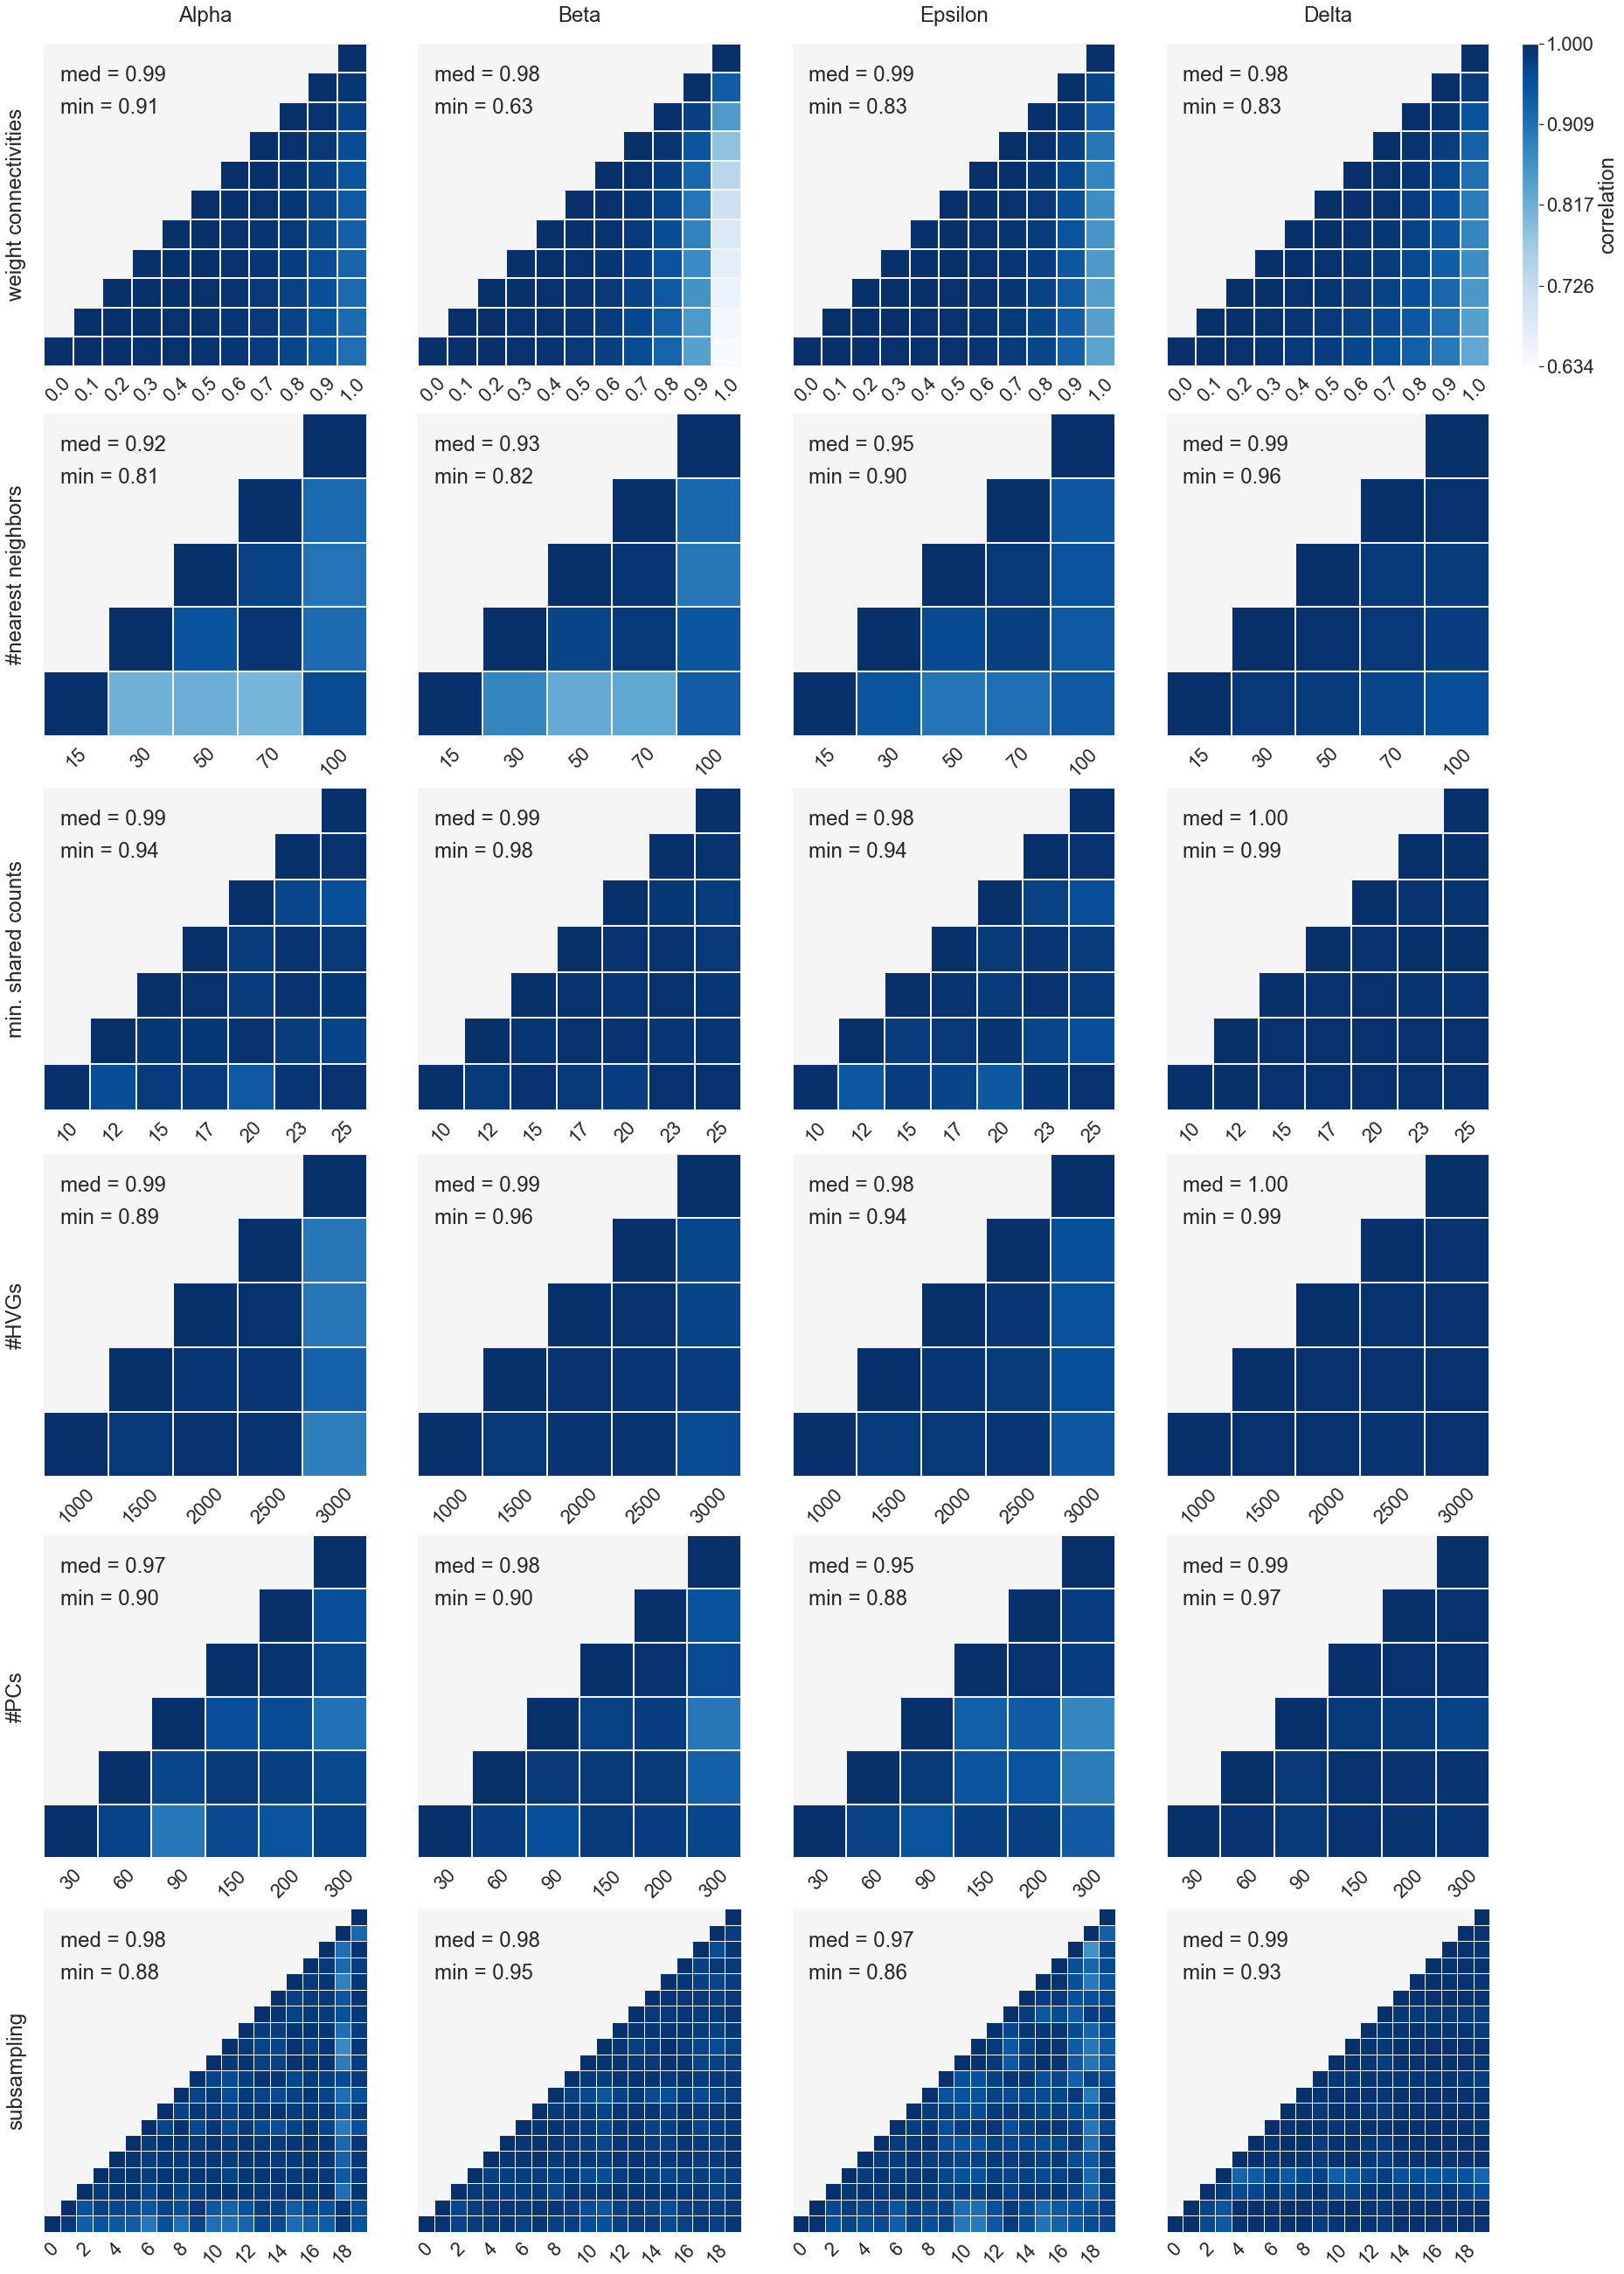

In [9]:
n = len(pretty_labels)
for name, dir_ in zip(names, roots):
    print("Processing:", name)
    fig, axess = plt.subplots(n, 4, figsize=(4 * 6, n * 6), constrained_layout=True, sharey="row")
    vmin, vmax, res = extract_min_max(dir_, pretty_labels.keys())
    
    for i, (fname, axes) in enumerate(zip(pretty_labels.keys(), axess)):
        data = res[fname]
        ylab = pretty_labels[fname]

        if fname == "subsampling.pickle":
            with open(dir_ / "subsampling_obs_names.pickle", "rb") as fin:
                obs_names = pickle.load(fin)
            tmp[name][ylab] = utils.plot_correlation_map(data, barcodes_align=False,
                                                         ylabel=ylab,
                                                         ranges=(vmin, vmax),
                                                         show_title=i==0,
                                                         show_cbar=i==0,
                                                         axes=axes, linewidths=1,
                                                         subsampling=obs_names,
                                                         linecolor="whitesmoke")
        else:
            tmp[name][ylab] = utils.plot_correlation_map(data,
                                                         ylabel=ylab,
                                                         ranges=(vmin, vmax),
                                                         show_title=i==0,
                                                         show_cbar=i==0,
                                                         axes=axes, linewidths=0.1,
                                                         linecolor="whitesmoke")
    
    if save_figure:
        (FIG_DIR / "suppl_fig_robustness").mkdir(parents=True, exist_ok=True)
        fig.savefig(FIG_DIR / "suppl_fig_robustness" / f"figure_{name}.pdf", dpi=400,
                    transparent=True, bbox_inches='tight')

## Plot det. vs stoch. mode for #neighbors

<ipython-input-10-0b037f895d6b>:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.1, wspace=0.1)


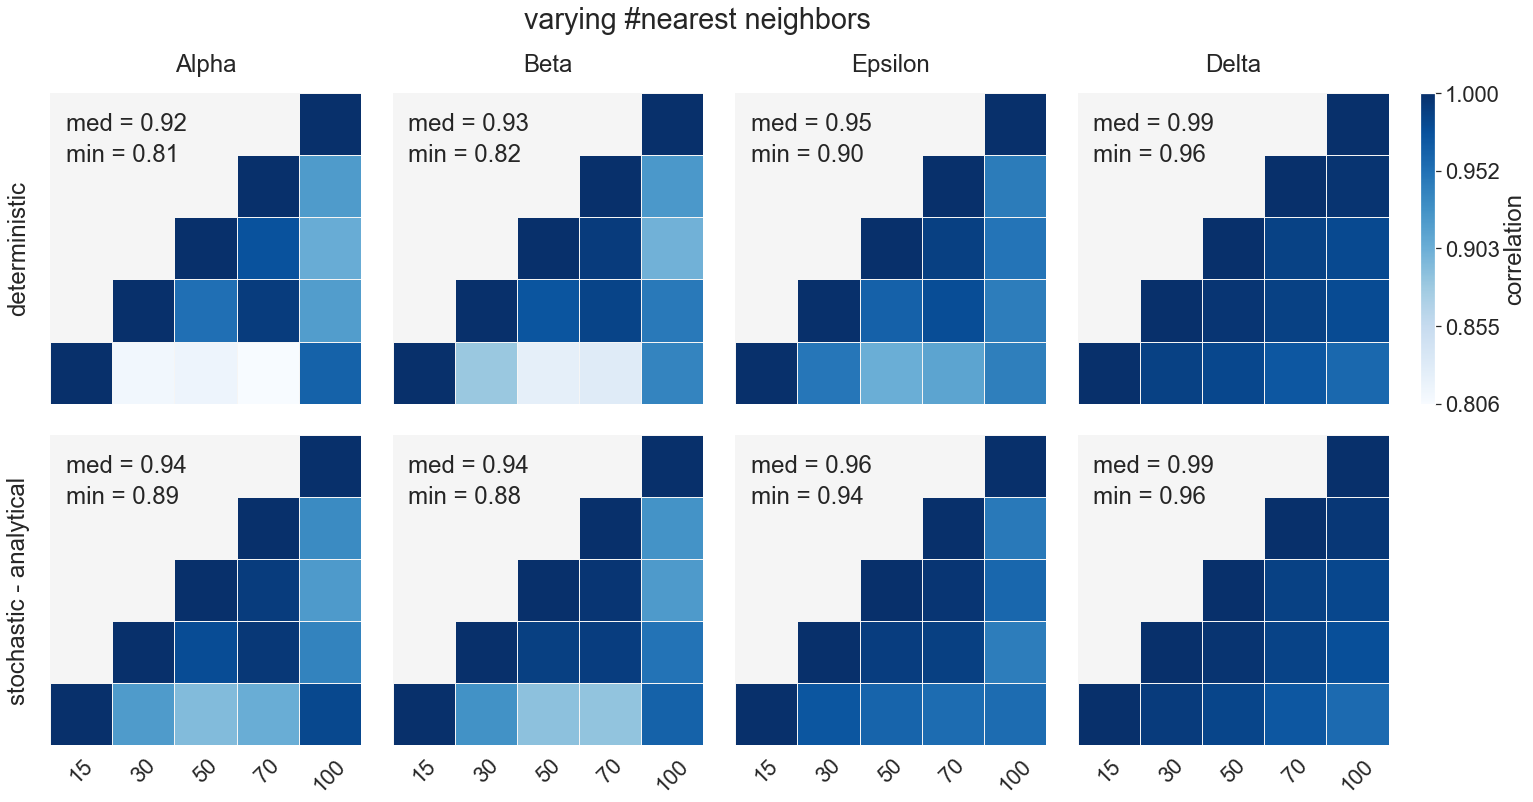

In [10]:
vmin, vmax, _ = extract_min_max(None, neighs)
fig, axess = plt.subplots(2, 4, figsize=(4 * 6, 2 * 6), constrained_layout=True, sharey="row", sharex="col")
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, (fname, ylab, axes) in enumerate(zip(neighs, ["deterministic", "stochastic - analytical"], axess)):
    with open(fname, "rb") as fin:
        data = pickle.load(fin)
        tmp['neighs'][ylab] = utils.plot_correlation_map(data,
                                                         ylabel=ylab,
                                                         show_title=i==0,
                                                         show_cbar=i==0,
                                                         ranges=(vmin, vmax),
                                                         axes=axes, linewidths=1,
                                                         linecolor="whitesmoke")

fig.suptitle(f"varying {pretty_labels['n_neighbors.pickle']}")
if save_figure:
    fig.savefig(FIG_DIR / "suppl_fig_robustness" / "det_stoch_comp.pdf", dpi=400,
                transparent=True, bbox_inches='tight')

### Calculate significance for the observed result

We use [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) to calculate the significance of improvement when using stochastic mode for each perturbation and lineage separately.

In [11]:
print(tmp.keys())
det, stoch = tmp['det_fixed'], tmp['stoch_fixed']
assert det.keys() == stoch.keys()

dict_keys(['stoch', 'stoch_fixed', 'det', 'det_fixed', 'neighs'])


In [12]:
res = {}
for k in det.keys():
    res[k] = utils._calculate_statistics(stoch[k], det[k])

gt, ts = defaultdict(dict), defaultdict(dict)
    
for cont, side in zip([gt, ts], ['greater', 'two-sided']):
    for k in det.keys():
        for lin, v in res[k][side].items():
            cont[f"{lin} p-value"][k] = v['res'].pvalue
            cont[f"{lin} statistic"][k] = v['res'].statistic

In [13]:
df = pd.DataFrame(ts)  # two-sided
df.to_csv(root / "two_sided.csv")
df

,Alpha p-value,Alpha statistic,Beta p-value,Beta statistic,Epsilon p-value,Epsilon statistic,Delta p-value,Delta statistic
weight connectivities,1.107615e-10,0.0,1.107615e-10,0.0,8.586917e-02,565.0,1.107615e-10,0.0
#nearest neighbors,1.953125e-03,0.0,1.953125e-03,0.0,1.953125e-03,0.0,9.218750e-01,26.0
min. shared counts,9.536743e-07,0.0,9.536743e-07,0.0,9.536743e-07,0.0,1.974106e-04,17.0
#HVGs,1.953125e-03,0.0,5.859375e-03,2.0,1.367188e-02,4.0,1.953125e-03,0.0
#PCs,3.051758e-04,3.0,1.507568e-02,18.0,6.103516e-04,5.0,1.806641e-02,19.0
subsampling,6.464700e-33,2.0,1.384592e-30,347.0,2.918326e-30,396.0,1.006772e-11,3907.0


In [14]:
df = pd.DataFrame(gt)  # one-sided (>)
df.to_csv(root / "one_sided.csv")
df

,Alpha p-value,Alpha statistic,Beta p-value,Beta statistic,Epsilon p-value,Epsilon statistic,Delta p-value,Delta statistic
weight connectivities,5.538076e-11,1540.0,5.538076e-11,1540.0,4.293458e-02,975.0,5.538076e-11,1540.0
#nearest neighbors,9.765625e-04,55.0,9.765625e-04,55.0,9.765625e-04,55.0,5.771484e-01,26.0
min. shared counts,4.768372e-07,231.0,4.768372e-07,231.0,4.768372e-07,231.0,9.870529e-05,214.0
#HVGs,9.765625e-04,55.0,2.929688e-03,53.0,6.835938e-03,51.0,9.765625e-04,55.0
#PCs,1.525879e-04,117.0,7.537842e-03,102.0,3.051758e-04,115.0,9.033203e-03,101.0
subsampling,3.232350e-33,18143.0,6.922958e-31,17798.0,1.459163e-30,17749.0,5.033861e-12,14238.0
